## *Câu hỏi:* ##
# Các đặc điểm về số tập, loại hình và thời lượng tập phim có tạo thành những cụm anime đặc trưng không? #

**Lợi ích:** 
- Xác định các nhóm anime có đặc điểm chung về số tập, loại hình, và thời lượng, qua đó nhận diện các mẫu trong dữ liệu.
- Hỗ trợ xây dựng danh mục anime theo từng nhóm nhằm dễ dàng tổ chức, tìm kiếm khi xây dựng hệ thống
---

# Đọc dữ liệu #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('anime_preprocessing.csv')
df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,Score,Scored By,Rank,Popularity
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,8.75,988000.0,482.0,43.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,8.38,219779.0,2092.0,631.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,8.22,380049.0,3602.0,258.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,7.24,44600.0,30982.0,1908.0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,6.93,6891.0,45862.0,5485.0


# Tiền xử lý #

### Giảm dữ liệu không cần thiết và xử lý null ###

In [3]:
# Bỏ những thuộc tính không xét đến để giảm dữ liệu khi tính toán
df = df.drop(columns=['Producers', 'Studios', 'Source', 'Genres'])
df.head()

,ID,Title,Episodes,Type,Aired,Duration,Score,Scored By,Rank,Popularity
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",24 min. per ep.,8.75,988000.0,482.0,43.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001",1 hr. 55 min.,8.38,219779.0,2092.0,631.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",24 min. per ep.,8.22,380049.0,3602.0,258.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002",25 min. per ep.,7.24,44600.0,30982.0,1908.0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005",23 min. per ep.,6.93,6891.0,45862.0,5485.0


In [4]:
# Kiểm tra dữ liệu thiếu
df.isnull().sum()

ID               0
Title            0
Episodes       265
Type             0
Aired            0
Duration         0
Score         8047
Scored By     8047
Rank          5141
Popularity       0
dtype: int64

In [5]:
# Vì dữ liệu thiếu không quá nhiều so với tập dữ liệu, và để tránh bị bias khi điền dữ liệu thì những dữ liệu null sẽ bị xóa
df = df.dropna()
df.isnull().sum()

ID            0
Title         0
Episodes      0
Type          0
Aired         0
Duration      0
Score         0
Scored By     0
Rank          0
Popularity    0
dtype: int64

### Chuẩn hóa ###

In [6]:
# Chuẩn hóa cột Duration
np.unique(df['Duration'])

array(['1 hr.', '1 hr. 1 min.', '1 hr. 1 min. per ep.', '1 hr. 10 min.',
       '1 hr. 11 min.', '1 hr. 11 min. per ep.', '1 hr. 12 min.',
       '1 hr. 12 min. per ep.', '1 hr. 13 min.', '1 hr. 14 min.',
       '1 hr. 14 min. per ep.', '1 hr. 15 min.', '1 hr. 16 min.',
       '1 hr. 16 min. per ep.', '1 hr. 17 min.', '1 hr. 17 min. per ep.',
       '1 hr. 18 min.', '1 hr. 19 min.', '1 hr. 2 min.',
       '1 hr. 2 min. per ep.', '1 hr. 20 min.', '1 hr. 20 min. per ep.',
       '1 hr. 21 min.', '1 hr. 22 min.', '1 hr. 23 min.',
       '1 hr. 23 min. per ep.', '1 hr. 24 min.', '1 hr. 25 min.',
       '1 hr. 26 min.', '1 hr. 27 min.', '1 hr. 27 min. per ep.',
       '1 hr. 28 min.', '1 hr. 28 min. per ep.', '1 hr. 29 min.',
       '1 hr. 3 min.', '1 hr. 30 min.', '1 hr. 30 min. per ep.',
       '1 hr. 31 min.', '1 hr. 32 min.', '1 hr. 33 min.',
       '1 hr. 33 min. per ep.', '1 hr. 34 min.', '1 hr. 35 min.',
       '1 hr. 35 min. per ep.', '1 hr. 36 min.', '1 hr. 36 min. per ep.',
      

In [7]:
# Vì Duration chứa nhiều định dạng, ta thống nhất chuyển sang số phút
def convert_duration(duration):
    if duration == 'UNKNOWN':
        return np.nan
    duration = duration.lower()
    hrs = re.search(r'(\d+) hr', duration)
    mins = re.search(r'(\d+) min', duration)
    secs = re.search(r'(\d+) sec', duration)

    total_mins = 0
    if hrs:
        total_mins += int(hrs.group(1))*60
    if mins:
        total_mins += int(mins.group(1))
    if secs:
        total_mins += int(secs.group(1))/60

    return round(total_mins,2)

df['Duration'] = df['Duration'].apply(convert_duration)
df = df.rename(columns={'Duration': 'Duration (mins)'})

In [8]:
df.head()

,ID,Title,Episodes,Type,Aired,Duration (mins),Score,Scored By,Rank,Popularity
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",24.0,8.75,988000.0,482.0,43.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001",115.0,8.38,219779.0,2092.0,631.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",24.0,8.22,380049.0,3602.0,258.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002",25.0,7.24,44600.0,30982.0,1908.0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005",23.0,6.93,6891.0,45862.0,5485.0


In [9]:
# Vì sau khi chuẩn hóa cột Duration sẽ tạo thêm các giá trị null do trong cột chứa các giá trị UNKNOWN, vì thế những dữ liệu này sẽ bị xóa
print(df.isnull().sum())
df = df.dropna()

ID                  0
Title               0
Episodes            0
Type                0
Aired               0
Duration (mins)    13
Score               0
Scored By           0
Rank                0
Popularity          0
dtype: int64


In [10]:
# Mã hóa cột Type bằng One-Hot Encoding vì thuật toán không thể làm việc với dữ liệu categorical
df = pd.get_dummies(df, columns=['Type'], drop_first=True)  # drop_first để tránh multicollinearity

In [11]:
# Chuẩn hóa các cột Episodes, Duration (mins), Type về cùng thang đo
# Lấy các cột cần chuẩn hóa
features = ['Episodes', 'Duration (mins)', 'Score'] + [col for col in df.columns if col.startswith('Type_')]
X = df[features]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Phân cụm dữ liệu #

### Chọn số phân cụm k

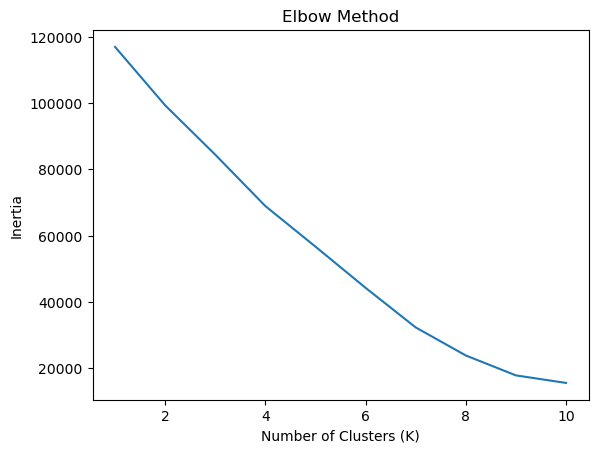

In [12]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

Phương pháp Elbow dựa trên Inertia (hoặc tổng bình phương khoảng cách từ điểm đến tâm cụm). Inertia giảm khi số cụm K tăng, nhưng có 1 điểm mà tại số sự giảm này chậm lại tạo thành góc cùi chỏ.

Dùng khi cần nhìn tổng quan, nhanh chóng. Nhưng khó nhìn ra cùi chỏ với dữ liệu hiện tại.

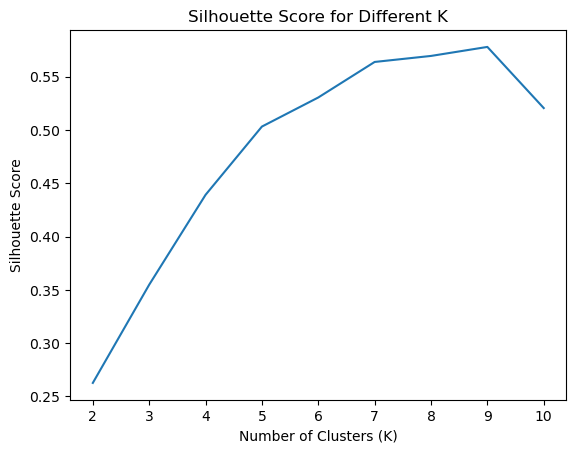

In [13]:
# Silhoutted Score
sil_score = []
for k in range(2, 11):  # Không thể tính silhouette score với 1 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_score.append(score)

plt.plot(range(2, 11), sil_score)
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


Silhouette Score đánh giá chất lượng phân cụm, thể hiện mức độ các điểm trong cùng một cụm gần nhau và mức độ các điểm trong các cụm khác biệt nhau. Điểm dao động từ -1 đến 1:
- 1: Cụm tốt (các điểm gần nhau trong cùng một cụm, xa các cụm khác).
- 0: Các điểm nằm ở ranh giới giữa các cụm.
- -1: Các điểm có thể bị phân cụm sai.

=> Chọn cụm K tại nơi điểm cao => K = 9

Dùng khi muốn chọn số cụm tối ưu và đánh giá mô hình phân cụm

### Thực hiện phân cụm

In [14]:
# Chọn số cụm K đã xác định (ví dụ K = 3)
kmeans = KMeans(n_clusters=9, random_state=42)

# Áp dụng K-Means và thêm nhãn cụm vào DataFrame
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [15]:
df.groupby('Cluster').mean()  # Tính giá trị trung bình của mỗi cụm


,ID,Episodes,Duration (mins),Score,Scored By,Rank,Popularity,Type_ONA,Type_OVA,Type_Special,Type_TV,Type_TV Special,Type_UNKNOWN
Cluster,,,,,,,,,,,,,
0,20292.356818,28.173640,21.118069,6.874247,83132.634945,53244.792109,5279.943204,0.000000,0.000000,0.000000,0.997615,0.0,0.0
1,18842.414971,1.012355,90.013081,7.055501,39717.299419,44638.860465,6687.999273,0.005814,0.005087,0.002907,0.000000,0.0,0.0
2,38323.675434,12.502367,9.888122,6.202083,6462.608627,82229.254077,11190.620200,1.000000,0.000000,0.000000,0.000000,0.0,0.0
3,7398.000000,20.000000,10.000000,6.030000,192.000000,96432.000000,14531.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
4,21970.365079,2.887446,12.475253,6.434069,9740.373016,72524.287157,8649.130592,0.000000,0.000000,1.000000,0.000000,0.0,0.0
5,11811.024441,2.638586,30.423521,6.312767,11622.118045,77617.449818,8536.022881,0.000000,1.000000,0.000000,0.000000,0.0,0.0
6,23195.068826,1.388664,40.340081,6.483725,11843.226721,70651.716599,8942.619433,0.000000,0.000000,0.000000,0.000000,1.0,0.0
7,15109.900000,1642.900000,7.800000,6.096000,4453.900000,92382.000000,12168.100000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
8,23527.893963,1.689628,16.671262,5.585906,2622.317337,106199.995356,13102.976780,0.000000,0.000000,0.000000,0.044892,0.0,0.0


### Phân tích cụm:

Các loại hình anime:
- ONA (Original Net Animation): Anime phát hành trực tuyến trên nền tảng streaming như Youtube, Netflix hay các web cung cấp anime   
- OVA (Original Video Animation): Anime phát hành dưới dạng video trực tiếp (DVD hay Blu-ray), có chất lượng cao, có thể là phần phụ hay anime độc lập.
- Special: Anime đặc biệt, thường là ngoại truyện hoặc tập ngắn.
- TV: Anime phát sóng trên truyền hình, được sản xuất dưới dạng các mùa.
- TV Special: Tập phim đặc biệt phát sóng trên truyền hình, thường là ngoại truyện hay tập ngắn.

Cụm 0:
- Episodes: trung bình 28.17 tập, cao hơn các cụm khác (trừ cụm 7).
- Duration (mins): trung bình 21.12 phút, thời lượng ngắn.
- Score: điểm trung bình 6.87, khá cao so với mức chung.
- Type: gần như thuộc thể loại TV.  
=> Cụm này tập trung các anime loại TV với thời lượng ngắn, điểm khá cao, thường thuộc các series thông thường.

Cụm 1:
- Episodes: trung bình 1.01 tập.
- Duration (mins): 90 phút, rất cao, có thể là Movie.
- Score: điểm trung bình 7.06, cao nhất trong các cụm.
- Type: không rõ ràng về loại hình (Type_ONA, Type_OVA... đều rất thấp).
=> Đây là cụm dành cho các anime dạng Movie hoặc các tập phim dài tập đặc biệt với chất lượng cao.  

Cụm 2:
- Episodes: trung bình 12.50 tập.
- Duration (mins): 9.98 phút, thời lượng ngắn.
- Score: điểm trung bình 6.20, thấp hơn so với cụm 0, 1.
- Type: Type_ONA.  
=> Đây là cụm tập trung các anime loại ONA, thường có thời lượng ngắn và điểm số trung bình.

Cụm 3:
- Episodes: 20 tập (cố định).
- Duration (mins): 10 phút, tương đối ngắn
- Score: 6.03, thấp nhất trong các cụm
- Type: UNKWOWN, không rõ loại hình  
=> Cụm này có thể đại diện cho các anime không rõ thông tin hoặc thuộc dạng không phổ biến.

Cụm 4:
- Episodes: trung bình 2.89 tập, rất ngắn.
- Duration (mins): trung bình 12.48, tương đối ngắn.
- Score: 6.43, ở mức trung bình.
- Type: TV_Special.  
=> Cụm này dành riêng cho anime TV_Special - những phần ngoại truyện hoặc tập ngắn.

Cụm 5:
- Episodes: trung bình 2.64 tập, ngắn nhất trong các cụm.
- Duration (mins): trung bình 30.42 phút, khá dài so với số tập.
- Score: 6.31, thấp hơn mức trung bình.
- Type:  OVA.
=> Cụm này dành riêng cho OVA, thường được phát hành dưới dạng đặt biệt với thời lượng dài hơn.

Cụm 6:
- Episodes: trung bình 1.38 tập, gần như chỉ có 1 tập.
- Duration (mins): trung bình 40.34 phút, thời lượng dài hơn các tập series bình thường.
- Score: 6.48, gần mức trung bình.
- Type: TV_Special.  
=> Đây là cụm dành riêng cho các tập đặc biệt của TV series.

Cụm 7:
- Episodes: trung bình 1642.9 tập, cực kỳ cao.
- Duration (mins): trung bình 7.8 phút, rất ngắn.
- Score: 6.10, thấp hơn mức trung bình.
- Type: TV.  
=> Cụm này đại diện cho các anime dài tập.

Cụm 8:
- Episodes: trung bình 1.69 tập, cực kỳ ngắn.
- Duration (mins): trung bình 16.67 phút, thuộc loại ngắn tập.
- Score: 5.59, thấp nhất trong tất cả các cụm.
- Type: không rõ loại hình, có 1 số thuộc TV.  
=> Đây là cụm dành cho các anime ngắn tập và có điểm số thấp.

**Đề xuất sử dụng cụm:**
- Cụm 0 và cụm 1 có điểm cao nhất, ưu tiên xem nếu chú trọng chất lượng.
- Cụm 2 thích hợp với người xem tìm kiếm điều mới lạ trên nền tảng trực tuyến.
- Cụm 4 và cụm 5 phù hợp cho người tìm kiếm anime ngắn hoặc OVA/Special.
- Cụm 7 dành cho những người thích series dài hơi.
- Cụm 6 dành cho những người đã xem phần chính mà muốn xem các tập đặc biệt hay ngoại truyện của nó.
- Cụm 3 và cụm 8 không phù hợp để đề xuất do chất lượng và sự không rõ ràng của nó.